In [28]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from matplotlib import pyplot as plt 
import roo_bs_calc as calc2
from matplotlib import pyplot as plt

In [29]:
#wk 2 4/4 - 4/8
df = pd.read_csv('spy_truncated.csv')

In [30]:
df.tail()

,date,callExp,ticker,underlying,strike,bid,ask,days_maturity,interest
77956,04-08-22 13:00,4/14/22,SPY,447.77,463.0,0.05,0.06,6.0,0.01
77957,04-08-22 13:00,4/14/22,SPY,447.77,464.0,0.04,0.05,6.0,0.01
77958,04-08-22 13:00,4/14/22,SPY,447.77,465.0,0.03,0.04,6.0,0.01
77959,04-08-22 13:00,4/14/22,SPY,447.77,466.0,0.03,0.04,6.0,0.01
77960,04-08-22 13:00,4/14/22,SPY,447.77,467.0,0.02,0.03,6.0,0.01


In [31]:
for i in range(len(df)):
    df['date'][i] = pd.to_datetime(df['date'][i])

/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_24553/2616375780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = pd.to_datetime(df['date'][i])


In [32]:
wk_4 = df.loc[df['date']>= dt.datetime(2022,4,4)]
wk_4 = wk_4.loc[df['date']<= dt.datetime(2022,4,9)]

In [33]:
wk_4['vol'] = 0.0
wk_4 = wk_4.reset_index(drop=True)

In [34]:
for i in range(len(wk_4)):
    s = wk_4['underlying'][i]
    k = wk_4['strike'][i]
    r = wk_4['interest'][i]
    t = wk_4['days_maturity'][i]/365
    C = (wk_4['bid'][i]+wk_4['ask'][i])/2.0
    wk_4['vol'][i] = calc2.iv_calc(s,k,t,r,C)

/Users/roofernando/Desktop/git_repo/smile_article/roo_bs_calc.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(s/k) + ((r + (i**2)/2))*t)/(i*np.sqrt(t))
/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_24553/3666660961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wk_4['vol'][i] = calc2.iv_calc(s,k,t,r,C)


In [11]:
#print(wk_1['vol'].mean(), wk_2['vol'].mean())
#0.141179916449231 0.17501913234768438

In [35]:
df_2 = wk_4

In [36]:
df_2 = df_2.loc[df_2['vol'] > 0.05]
df_2 = df_2.loc[df_2['vol'] < 0.9]

df_2['pct_away'] = 0.0

df_2 = df_2.reset_index(drop=True)

In [37]:
for i in range(len(df_2)):
    df_2['pct_away'][i] = ((df_2['strike'][i]/df_2['underlying'][i])-1)*100

/var/folders/qs/08lrvdq116j2p_7gkyvmdryw0000gn/T/ipykernel_24553/3497575406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['pct_away'][i] = ((df_2['strike'][i]/df_2['underlying'][i])-1)*100


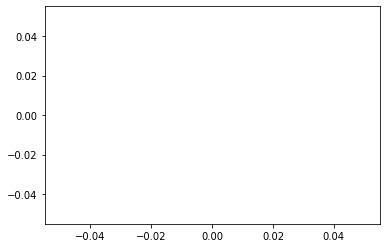

In [20]:
plt.scatter(df_2['pct_away'],df_2['vol'])

In [21]:
df_2.to_csv("4_4_to_4_8_new.csv")